In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

In [3]:
%cd '/content/drive/MyDrive/dsplay/dataset/labels'

/content/drive/.shortcut-targets-by-id/1BO8i-n1PhS8c48qOttEd5gQG9oUR6PJU/dsplay/dataset/labels


In [4]:
files = os.listdir()
print(len(files))
files[:5]

5686


['Short_stature__out__Building_area__00004__scene02774.txt',
 'Short_stature__out__Building_area__00004__scene00001.txt',
 'Short_stature__out__Market__00047__scene01240.txt',
 'Short_stature__out__Market__00047__scene00827.txt',
 'Short_stature__out__Market__00028__scene00119.txt']

In [5]:
def getLabel(label: str):
    return label[2:-1]

yaml = open('/content/drive/MyDrive/dsplay/dataset/data.yaml', 'r').readlines()
labels = list(map(getLabel, yaml[1:-3]))

print(len(labels))
print(labels)

24
['person', 'powerpole', 'motorcycle', 'car', 'chair', 'signboard', 'barrigate', 'bench', 'pot', 'colorcone', 'bicycle', 'stop', 'bollard', 'tree', 'trash', 'sculpture', 'collectionbox', 'table', 'burlapbag', 'stand', 'trashcan', 'box', 'cart', 'kickboard']


In [6]:
placeList = ['Building_area', 'Market', 'Park', 'Residential_area']

def getPlace(txt: str):
    for place in placeList:
        if place in txt:
            return place

In [7]:
data = pd.DataFrame(columns = ['label', 'width', 'height', 'bbox', 'place'])

for i in tqdm(range(len(files))):
    targets = open(files[i], 'r').readlines()
    place = getPlace(files[i])
    for target in targets:
        spl = target.split()
        label = labels[int(spl[0])]
        width, height = float(spl[3]), float(spl[4])
        bbox = width * height
        data.loc[len(data)] = [label, width, height, bbox, place]

100%|██████████| 5686/5686 [02:18<00:00, 40.96it/s]


In [8]:
data

,label,width,height,bbox,place
0,car,0.112500,0.129167,0.014531,Building_area
1,car,0.309375,0.433333,0.134062,Building_area
2,burlapbag,0.149219,0.430556,0.064247,Building_area
3,car,0.050000,0.077778,0.003889,Building_area
4,signboard,0.070312,0.266667,0.018750,Market
...,...,...,...,...,...
19849,car,0.048438,0.083333,0.004036,Market
19850,signboard,0.045312,0.136111,0.006168,Market
19851,signboard,0.060937,0.230556,0.014050,Market
19852,powerpole,0.054688,0.809722,0.044282,Market


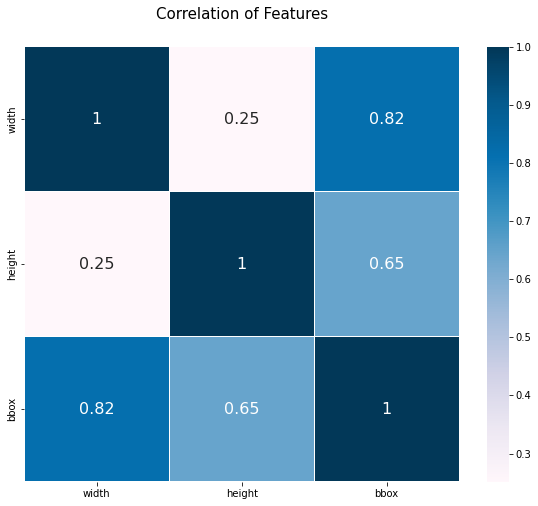

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data[['width', 'height', 'bbox']].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
plt.show()

In [ ]:
data.to_csv('../../BBOX_data.csv', index=None)

In [12]:
def getIndex(s: str):
    try:
        return labels.index(s)
    except:
        return placeList.index(s)

In [13]:
data['label_idx'] = data['label'].map(getIndex)
data['place_idx'] = data['place'].map(getIndex)
data

,label,width,height,bbox,place,label_idx,place_idx
0,car,0.112500,0.129167,0.014531,Building_area,3,0
1,car,0.309375,0.433333,0.134062,Building_area,3,0
2,burlapbag,0.149219,0.430556,0.064247,Building_area,18,0
3,car,0.050000,0.077778,0.003889,Building_area,3,0
4,signboard,0.070312,0.266667,0.018750,Market,5,1
...,...,...,...,...,...,...,...
19849,car,0.048438,0.083333,0.004036,Market,3,1
19850,signboard,0.045312,0.136111,0.006168,Market,5,1
19851,signboard,0.060937,0.230556,0.014050,Market,5,1
19852,powerpole,0.054688,0.809722,0.044282,Market,1,1


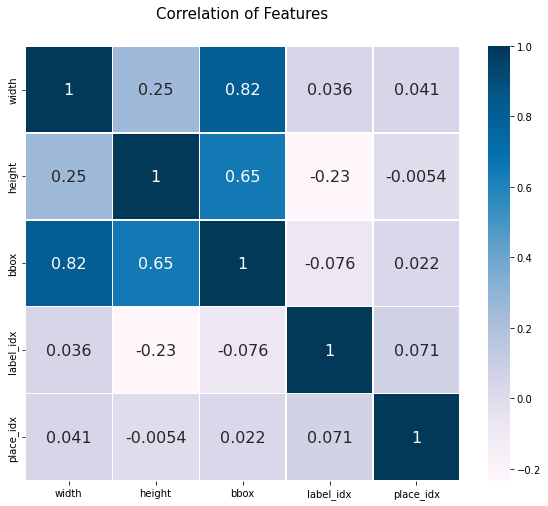

In [14]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data[['width', 'height', 'bbox', 'label_idx', 'place_idx']].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
plt.show()

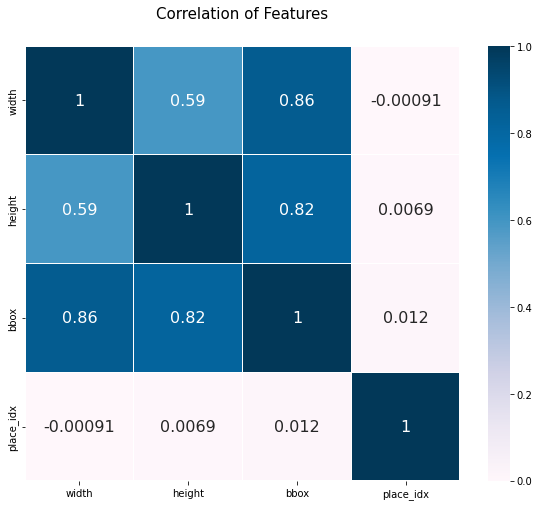

In [15]:
carData = data[(data['label'] == 'car')|(data['label'] == 'bicycle')|(data['label'] == 'motorcycle')]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(carData[['width', 'height', 'bbox', 'place_idx']].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
plt.show()

In [16]:
countList = dict()
for label in labels:
    countList[label] = len(data[data['label'] == label])

def getCount(label: str):
    return countList[label]

In [17]:
data['count'] = data['label'].map(getCount)
data

,label,width,height,bbox,place,label_idx,place_idx,count
0,car,0.112500,0.129167,0.014531,Building_area,3,0,5827
1,car,0.309375,0.433333,0.134062,Building_area,3,0,5827
2,burlapbag,0.149219,0.430556,0.064247,Building_area,18,0,39
3,car,0.050000,0.077778,0.003889,Building_area,3,0,5827
4,signboard,0.070312,0.266667,0.018750,Market,5,1,1028
...,...,...,...,...,...,...,...,...
19849,car,0.048438,0.083333,0.004036,Market,3,1,5827
19850,signboard,0.045312,0.136111,0.006168,Market,5,1,1028
19851,signboard,0.060937,0.230556,0.014050,Market,5,1,1028
19852,powerpole,0.054688,0.809722,0.044282,Market,1,1,3361


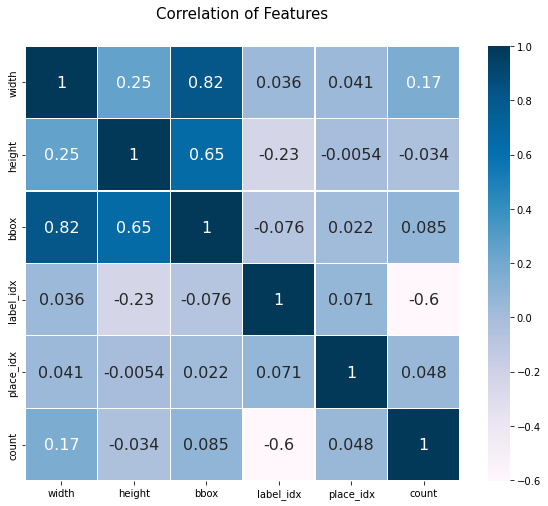

In [18]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data[['width', 'height', 'bbox', 'label_idx', 'place_idx', 'count']].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
plt.show()

In [19]:
labeled_data = pd.DataFrame(columns = ['label', 'count', 'width_avg', 'height_avg', 'bbox_avg', 'prop'])

for label in labels:
    target = data[data['label'] == label]
    number = len(target)
    w_avg = target['width'].mean()
    h_avg = target['height'].mean()
    bbox_avg = target['bbox'].mean()
    labeled_data.loc[len(labeled_data)] = [label, number, w_avg, h_avg, bbox_avg, number/len(data)]

In [21]:
labeled_data.sort_values(by=['count'], ascending=False)

,label,count,width_avg,height_avg,bbox_avg,prop
3,car,5827,0.161096,0.255265,0.055809,0.293492
0,person,5068,0.084903,0.392630,0.042682,0.255263
1,powerpole,3361,0.075685,0.684149,0.055234,0.169286
2,motorcycle,1249,0.130082,0.251132,0.045439,0.062909
5,signboard,1028,0.082078,0.311056,0.029640,0.051778
4,chair,942,0.143384,0.217415,0.046273,0.047446
6,barrigate,597,0.081150,0.529438,0.050783,0.030070
12,bollard,484,0.075633,0.248472,0.021369,0.024378
11,stop,342,0.092912,0.247721,0.029395,0.017226
14,trash,232,0.060382,0.298743,0.019067,0.011685


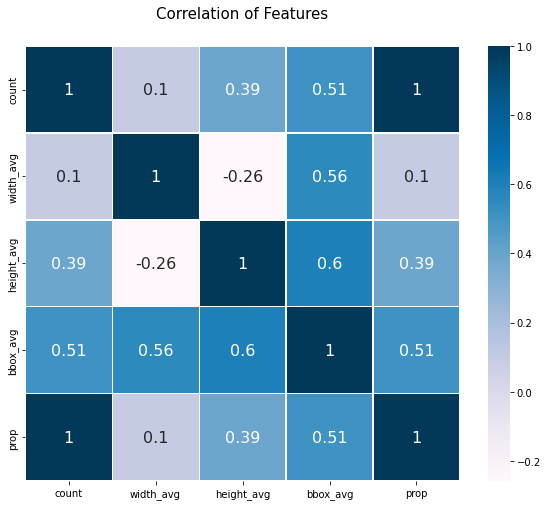

In [22]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(labeled_data[['count', 'width_avg', 'height_avg', 'bbox_avg', 'prop']].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
plt.show()